# import

In [ ]:
!pip install wandb

     |████████████████████████████████| 1.8MB 5.4MB/s 
     |████████████████████████████████| 102kB 9.4MB/s 
     |████████████████████████████████| 163kB 28.2MB/s 
     |████████████████████████████████| 133kB 26.6MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=337474785a878a0c3a6e992b7924b3e38e770d806f2125464cf92c5c90a997c0
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=adcdaa16877409f9f0e873ca54d5664f617ab03dc2104890c61ebe7a868853c6
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [ ]:
!wandb login

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
import wandb
from wandb.keras import WandbCallback

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import itertools
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import namedtuple
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:

file0 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/couple.csv', thousands=',')
file1 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/family.csv', thousands=',')
file2 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/hotel.csv', thousands=',')
file3 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/guesthouse1.csv', thousands=',')
file4 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/guesthouse2.csv', thousands=',')
file5 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension1.csv', thousands=',')
file6 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension2.csv', thousands=',')
file7 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension3.csv', thousands=',')
file8 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension4.csv', thousands=',')

In [ ]:
data_df = pd.concat([file0, file1, file2, file3, file4, file5, file6, file7, file8], ignore_index=True)

In [ ]:
data_df

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y
0,0,couple,1,514,버드나무브루어리,"호프,요리주점",4.0,304,강원 강릉시 경강로 1961,37.748230,128.884360,1
1,0,couple,2,501,테라로사 커피공장,커피전문점,3.5,871,강원 강릉시 구정면 현천길 7,37.696005,128.891887,1
2,0,couple,3,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,1
3,0,couple,4,676,횡성한우촌,"육류,고기",4.7,37,강원 강릉시 성덕포남로200번길 6,37.769576,128.907955,1
4,0,couple,5,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91072,11190,pension,8,562,바로방,"제과,베이커리",3.2,153,강원 강릉시 경강로 2092,37.754340,128.895874,0
91073,11935,pension,9,940,뚱할머니순두부,두부전문점,4.3,17,강원 강릉시 난설헌로 211,37.791904,128.912459,0
91074,11494,pension,3,756,스시코우,"초밥,롤",3.3,51,강원 강릉시 하슬라로206번길 16-3,37.767244,128.877471,0
91075,12105,pension,9,2835,홍익돈까스 춘천점,"돈까스,우동",2.6,43,강원 춘천시 새롬공원길5번길 11,37.853221,127.745688,0


In [ ]:
data_df['belief'] = 0
data_df 

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,0,couple,1,514,버드나무브루어리,"호프,요리주점",4.0,304,강원 강릉시 경강로 1961,37.748230,128.884360,1,0
1,0,couple,2,501,테라로사 커피공장,커피전문점,3.5,871,강원 강릉시 구정면 현천길 7,37.696005,128.891887,1,0
2,0,couple,3,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,1,0
3,0,couple,4,676,횡성한우촌,"육류,고기",4.7,37,강원 강릉시 성덕포남로200번길 6,37.769576,128.907955,1,0
4,0,couple,5,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91072,11190,pension,8,562,바로방,"제과,베이커리",3.2,153,강원 강릉시 경강로 2092,37.754340,128.895874,0,0
91073,11935,pension,9,940,뚱할머니순두부,두부전문점,4.3,17,강원 강릉시 난설헌로 211,37.791904,128.912459,0,0
91074,11494,pension,3,756,스시코우,"초밥,롤",3.3,51,강원 강릉시 하슬라로206번길 16-3,37.767244,128.877471,0,0
91075,12105,pension,9,2835,홍익돈까스 춘천점,"돈까스,우동",2.6,43,강원 춘천시 새롬공원길5번길 11,37.853221,127.745688,0,0


In [ ]:
data_df[data_df['y'] == 0]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
1235,521,couple,9,739,옛카나리아,"해물,생선",3.3,37,강원 강릉시 성산면 구산길 72-1,37.715087,128.829268,0,0
1236,598,couple,3,865,마시와 본점,"제과,베이커리",3.7,50,강원 강릉시 창해로350번길 19,37.795772,128.917659,0,0
1237,408,couple,3,2681,감미옥,설렁탕,3.3,14,강원 춘천시 춘천로 217,37.878002,127.737803,0,0
1238,147,couple,7,2736,편백족발,"족발,보쌈",3.8,23,강원 춘천시 후석로 242-1,37.873126,127.752961,0,0
1239,169,couple,8,2849,플랩잭팬트리 춘천점,이탈리안,2.9,24,강원 춘천시 동내면 외솔길19번길 70,37.857332,127.753750,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91072,11190,pension,8,562,바로방,"제과,베이커리",3.2,153,강원 강릉시 경강로 2092,37.754340,128.895874,0,0
91073,11935,pension,9,940,뚱할머니순두부,두부전문점,4.3,17,강원 강릉시 난설헌로 211,37.791904,128.912459,0,0
91074,11494,pension,3,756,스시코우,"초밥,롤",3.3,51,강원 강릉시 하슬라로206번길 16-3,37.767244,128.877471,0,0
91075,12105,pension,9,2835,홍익돈까스 춘천점,"돈까스,우동",2.6,43,강원 춘천시 새롬공원길5번길 11,37.853221,127.745688,0,0


# deepfm


In [ ]:
ALL_FIELDS = ['user_id',	'trip',	'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address','place_lat','place_lng']
CONT_FIELDS = ['user_id', 'course', 'place_id', 'rating', 'review', 'place_lat', 'place_lng', 'belief']
CAT_FIELDS = list(set(ALL_FIELDS).difference(CONT_FIELDS))

In [ ]:
dense_features = CONT_FIELDS
sparse_features = CAT_FIELDS

In [ ]:
data_df.dtypes

user_id             int64
trip               object
course              int64
place_id            int64
place_name         object
place_category     object
rating            float64
review              int64
place_address      object
place_lat         float64
place_lng         float64
y                   int64
belief              int64
dtype: object

In [ ]:
def data_process(data_df, dense_features, sparse_features): 
    
    data_df[dense_features] = data_df[dense_features].fillna(0.0)
      
    data_df[sparse_features] = data_df[sparse_features].fillna("-1")
    
    for f in sparse_features:
      if f in data_df.columns:
        le = LabelEncoder()
        i = data_df.columns.get_loc(f)
        data_df.iloc[:,i] = data_df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')
    
    return data_df[dense_features + sparse_features]

train_data = data_process(data_df, dense_features, sparse_features)
train_data['label'] = data_df['y']
train_data

,user_id,course,place_id,rating,review,place_lat,place_lng,belief,place_category,trip,place_name,place_address,label
0,0,1,514,4.0,304,37.748230,128.884360,0,137,0,679,121,1
1,0,2,501,3.5,871,37.696005,128.891887,0,112,0,1697,200,1
2,0,3,4,4.1,197,37.795486,128.917920,0,132,0,120,109,1
3,0,4,676,4.7,37,37.769576,128.907955,0,83,0,1888,336,1
4,0,5,20,4.3,88,37.791905,128.915830,0,136,0,190,712,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91072,11190,8,562,3.2,153,37.754340,128.895874,0,95,4,637,124,0
91073,11935,9,940,4.3,17,37.791904,128.912459,0,30,4,502,232,0
91074,11494,3,756,3.3,51,37.767244,128.877471,0,105,4,969,766,0
91075,12105,9,2835,2.6,43,37.853221,127.745688,0,26,4,1858,1197,0


In [ ]:
SparseFeat = namedtuple('SparseFeat', ['name', 'vocabulary_size', 'embedding_dim'])
DenseFeat = namedtuple('DenseFeat', ['name', 'dimension'])

linear_feature_columns = [SparseFeat(feat, vocabulary_size=data_df[feat].nunique(),embedding_dim=4)
                        for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                        for feat in dense_features]
dnn_feature_columns = [SparseFeat(feat, vocabulary_size=data_df[feat].nunique(),embedding_dim=4)
                        for i,feat in enumerate(sparse_features)] + [DenseFeat(feat, 1,)
                        for feat in dense_features]

print(linear_feature_columns)
print(dnn_feature_columns)

[SparseFeat(name='place_category', vocabulary_size=139, embedding_dim=4), SparseFeat(name='trip', vocabulary_size=5, embedding_dim=4), SparseFeat(name='place_name', vocabulary_size=1894, embedding_dim=4), SparseFeat(name='place_address', vocabulary_size=1587, embedding_dim=4), DenseFeat(name='user_id', dimension=1), DenseFeat(name='course', dimension=1), DenseFeat(name='place_id', dimension=1), DenseFeat(name='rating', dimension=1), DenseFeat(name='review', dimension=1), DenseFeat(name='place_lat', dimension=1), DenseFeat(name='place_lng', dimension=1), DenseFeat(name='belief', dimension=1)]
[SparseFeat(name='place_category', vocabulary_size=139, embedding_dim=4), SparseFeat(name='trip', vocabulary_size=5, embedding_dim=4), SparseFeat(name='place_name', vocabulary_size=1894, embedding_dim=4), SparseFeat(name='place_address', vocabulary_size=1587, embedding_dim=4), DenseFeat(name='user_id', dimension=1), DenseFeat(name='course', dimension=1), DenseFeat(name='place_id', dimension=1), Den

In [ ]:
def build_input_layers(feature_columns):
    dense_input_dict, sparse_input_dict = {}, {}

    for fc in feature_columns:
        if isinstance(fc, SparseFeat):
            sparse_input_dict[fc.name] = Input(shape=(1, ), name=fc.name)
        elif isinstance(fc, DenseFeat):
            dense_input_dict[fc.name] = Input(shape=(fc.dimension, ), name=fc.name)
        
    return dense_input_dict, sparse_input_dict

dense_input_dict, sparse_input_dict = build_input_layers(linear_feature_columns + dnn_feature_columns)
print(dense_input_dict)
print(sparse_input_dict)

{'user_id': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'user_id')>, 'course': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'course')>, 'place_id': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_id')>, 'rating': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'rating')>, 'review': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'review')>, 'place_lat': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_lat')>, 'place_lng': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_lng')>, 'belief': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'belief')>}
{'place_category': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_category')>, 'trip': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trip')>, 'place_name': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_name')>, 'place_address': <KerasTensor: shape

In [ ]:
input_layers = list(dense_input_dict.values()) + list(sparse_input_dict.values())
print(input_layers)

[<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'user_id')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'course')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_id')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'rating')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'review')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_lat')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_lng')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'belief')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_category')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'trip')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_name')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'place_address')>]


In [ ]:
def build_embedding_layers(feature_columns, input_layers_dict, is_linear):
    
    embedding_layers_dict = dict()
    
    
    sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), feature_columns)) if feature_columns else []
    
    
    if is_linear:
        for fc in sparse_feature_columns:
            embedding_layers_dict[fc.name] = Embedding(fc.vocabulary_size, 1, name='1d_emb_' + fc.name)
    else:
        for fc in sparse_feature_columns:
            embedding_layers_dict[fc.name] = Embedding(fc.vocabulary_size, fc.embedding_dim, name='kd_emb_' + fc.name)
    
    return embedding_layers_dict

embedding_layers = build_embedding_layers(dnn_feature_columns, sparse_input_dict, is_linear=False)
print(embedding_layers)

{'place_category': <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fa755d46f10>, 'trip': <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fa7561d30d0>, 'place_name': <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fa7561d3050>, 'place_address': <tensorflow.python.keras.layers.embeddings.Embedding object at 0x7fa7a1fd2350>}


In [ ]:
linear_sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), linear_feature_columns))
print(linear_sparse_feature_columns)

[SparseFeat(name='place_category', vocabulary_size=139, embedding_dim=4), SparseFeat(name='trip', vocabulary_size=5, embedding_dim=4), SparseFeat(name='place_name', vocabulary_size=1894, embedding_dim=4), SparseFeat(name='place_address', vocabulary_size=1587, embedding_dim=4)]


In [ ]:
def get_linear_logits(dense_input_dict, sparse_input_dict, sparse_feature_columns):
    
    
    concat_dense_inputs = Concatenate(axis=1)(list(dense_input_dict.values()))
    dense_logits_output = Dense(1)(concat_dense_inputs)
    
    linear_embedding_layers = build_embedding_layers(sparse_feature_columns, sparse_input_dict, is_linear=True)
    
    
    sparse_1d_embed = []
    for fc in sparse_feature_columns:
        feat_input = sparse_input_dict[fc.name]
        embed = Flatten()(linear_embedding_layers[fc.name](feat_input)) # B x 1
        sparse_1d_embed.append(embed)

    
    sparse_logits_output = Add()(sparse_1d_embed)

    linear_logits = Add()([dense_logits_output, sparse_logits_output])
    return linear_logits

linear_logits = get_linear_logits(dense_input_dict, sparse_input_dict, linear_sparse_feature_columns)
print(linear_logits)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='add_1/add:0', description="created by layer 'add_1'")


In [ ]:
dnn_sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), dnn_feature_columns))
print(dnn_sparse_feature_columns)

[SparseFeat(name='place_category', vocabulary_size=139, embedding_dim=4), SparseFeat(name='trip', vocabulary_size=5, embedding_dim=4), SparseFeat(name='place_name', vocabulary_size=1894, embedding_dim=4), SparseFeat(name='place_address', vocabulary_size=1587, embedding_dim=4)]


In [ ]:
class FM_Layer(Layer):
    def __init__(self):
        super(FM_Layer, self).__init__()

    def call(self, inputs):
        
        concated_embeds_value = inputs  # B x n x k

        square_of_sum = tf.square(tf.reduce_sum(concated_embeds_value, axis=1, keepdims=True))  # B x 1 x k
        sum_of_square = tf.reduce_sum(concated_embeds_value * concated_embeds_value, axis=1, keepdims=True)  # B x1 xk
        cross_term = square_of_sum - sum_of_square  # B x 1 x k
        cross_term = 0.5 * tf.reduce_sum(cross_term, axis=2, keepdims=False)  # B x 1

        return cross_term

    def compute_output_shape(self, input_shape):
        return (None, 1)

In [ ]:
def get_fm_logits(sparse_input_dict, sparse_feature_columns, dnn_embedding_layers):
  
    
    sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), sparse_feature_columns))

    
    sparse_kd_embed = []
    for fc in sparse_feature_columns:
        feat_input = sparse_input_dict[fc.name]
        _embed = dnn_embedding_layers[fc.name](feat_input)  # B x 1 x k
        sparse_kd_embed.append(_embed)

    
    concat_sparse_kd_embed = Concatenate(axis=1)(sparse_kd_embed)  # B x n x k
    fm_cross_out = FM_Layer()(concat_sparse_kd_embed)

    return fm_cross_out

fm_logits = get_fm_logits(sparse_input_dict, dnn_sparse_feature_columns, embedding_layers)
print(fm_logits)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='fm__layer/mul_1:0', description="created by layer 'fm__layer'")


In [ ]:
def get_dnn_logits(sparse_input_dict, sparse_feature_columns, dnn_embedding_layers):
    
    sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), sparse_feature_columns))

   
    sparse_kd_embed = []
    for fc in sparse_feature_columns:
        feat_input = sparse_input_dict[fc.name]
        _embed = dnn_embedding_layers[fc.name](feat_input)  # B x 1 x k
        _embed = Flatten()(_embed)  # B x k
        sparse_kd_embed.append(_embed)

    concat_sparse_kd_embed = Concatenate(axis=1)(sparse_kd_embed)  # B x nk   

    
    mlp_out = Dropout(0.5)(Dense(256, activation='relu')(concat_sparse_kd_embed))  
    mlp_out = Dropout(0.3)(Dense(256, activation='relu')(mlp_out))
    mlp_out = Dropout(0.1)(Dense(256, activation='relu')(mlp_out))

    dnn_out = Dense(1)(mlp_out)

    return dnn_out

dnn_logits = get_dnn_logits(sparse_input_dict, dnn_sparse_feature_columns, embedding_layers)
print(dnn_logits)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_4/BiasAdd:0', description="created by layer 'dense_4'")


In [ ]:
def DeepFM(linear_feature_columns, dnn_feature_columns):
    dense_input_dict, sparse_input_dict = build_input_layers(linear_feature_columns + dnn_feature_columns)
    
    
    input_layers = list(dense_input_dict.values()) + list(sparse_input_dict.values())
    
    
    embedding_layers = build_embedding_layers(dnn_feature_columns, sparse_input_dict, is_linear=False)

    
    linear_sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), linear_feature_columns))

    
    linear_logits = get_linear_logits(dense_input_dict, sparse_input_dict, linear_sparse_feature_columns)
    
    
    dnn_sparse_feature_columns = list(filter(lambda x: isinstance(x, SparseFeat), dnn_feature_columns))

    
    fm_logits = get_fm_logits(sparse_input_dict, dnn_sparse_feature_columns, embedding_layers)

    
    dnn_logits = get_dnn_logits(sparse_input_dict, dnn_sparse_feature_columns, embedding_layers)

    
    output_logits = Add()([linear_logits, fm_logits, dnn_logits])

    
    output_layers = Activation("sigmoid")(output_logits)

    
    model = Model(input_layers, output_layers)
    
    return model

In [ ]:
history = DeepFM(linear_feature_columns, dnn_feature_columns)

In [ ]:
history.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
place_category (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
trip (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
place_name (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
place_address (InputLayer)      [(None, 1)]          0                                            
______________________________________________________________________________________________

In [ ]:
history.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
LERANRATE = 0.0001
EPOCH = 50
BATCHSIZE = 256
run = wandb.init(project='DeepFM',
                 config={  # and include hyperparameters and metadata
                     "learning_rate": LERANRATE,
                     "epochs": EPOCH,
                     "batch_size": BATCHSIZE,
                     "loss_function": "categorical_crossentropy",
                     "architecture": "DeepFM learning",
                     "dataset": "original(balanced)"
                 })
config = wandb.config  # We'll use this to configure our experiment
callbacks=[WandbCallback()] #콜백함수에 chkpt추가 (early_stop)
tf.keras.backend.clear_session()

wandb: Currently logged in as: hyoojjin (use `wandb login --relogin` to force relogin)


In [ ]:
test_d = train_data.sample(frac=0.2,random_state=2019)
len(test_d)

18215

In [ ]:
train_d = train_data.drop(test_d.index)
len(train_d)

72862

In [ ]:
train_model_input = {name: train_d[name] for name in dense_features + sparse_features}
train_model_input

{'belief': 0        0
 1        0
 3        0
 4        0
 5        0
         ..
 91069    0
 91070    0
 91071    0
 91073    0
 91074    0
 Name: belief, Length: 72862, dtype: int64, 'course': 0        1
 1        2
 3        4
 4        5
 5        6
         ..
 91069    8
 91070    4
 91071    8
 91073    9
 91074    3
 Name: course, Length: 72862, dtype: int64, 'place_address': 0         121
 1         200
 3         336
 4         712
 5         694
          ... 
 91069    1103
 91070     578
 91071     530
 91073     232
 91074     766
 Name: place_address, Length: 72862, dtype: int64, 'place_category': 0        137
 1        112
 3         83
 4        136
 5        132
         ... 
 91069    129
 91070      5
 91071     25
 91073     30
 91074    105
 Name: place_category, Length: 72862, dtype: int64, 'place_id': 0         514
 1         501
 3         676
 4          20
 5           6
          ... 
 91069    2816
 91070     557
 91071     316
 91073     940
 91074     75

#deepFM 학습

In [ ]:
hist = history.fit(train_model_input, train_d['label'].values, batch_size=BATCHSIZE, epochs=EPOCH, validation_split=0.2, callbacks = callbacks)
run.join()
print(hist.history.keys())

Epoch 1/50
228/228 [==============================] - 6s 16ms/step - loss: 90.3194 - accuracy: 0.8218 - val_loss: 39.4095 - val_accuracy: 0.8875
Epoch 2/50
228/228 [==============================] - 3s 15ms/step - loss: 12.5529 - accuracy: 0.9273 - val_loss: 32.8417 - val_accuracy: 0.8638
Epoch 3/50
228/228 [==============================] - 3s 14ms/step - loss: 8.0143 - accuracy: 0.9296 - val_loss: 18.6502 - val_accuracy: 0.8668
Epoch 4/50
228/228 [==============================] - 3s 14ms/step - loss: 4.2143 - accuracy: 0.9318 - val_loss: 9.2822 - val_accuracy: 0.8438
Epoch 5/50
228/228 [==============================] - 3s 14ms/step - loss: 1.9102 - accuracy: 0.9335 - val_loss: 1.1045 - val_accuracy: 0.9526
Epoch 6/50
228/228 [==============================] - 3s 14ms/step - loss: 1.0564 - accuracy: 0.9328 - val_loss: 0.8121 - val_accuracy: 0.9511
Epoch 7/50
228/228 [==============================] - 3s 14ms/step - loss: 0.7310 - accuracy: 0.9325 - val_loss: 0.5898 - val_accuracy: 0

epoch,49
loss,0.07752
accuracy,0.96989
val_loss,0.09429
val_accuracy,0.97303
_runtime,175
_timestamp,1623912151
_step,49
best_val_loss,0.0871
best_epoch,31


epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
loss,█▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
accuracy,▁▆▆▆▆▆▆▇▇▇▇▇██▇█████████████████████████
val_loss,█▇▄▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▃▂▂▁▇▇▇▇████▇███████▄██▇▇█▇▇▇█████▇█▇█▇█
_runtime,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_timestamp,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███
_step,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇███


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
test_model_input = {name: test_d[name] for name in dense_features + sparse_features}
loss, acc = history.evaluate(test_model_input, test_d['label'].values)

570/570 [==============================] - 1s 2ms/step - loss: 0.0933 - accuracy: 0.9716


In [ ]:
print(f'test_loss: {loss} - test_acc: {acc}')

test_loss: 0.09332768619060516 - test_acc: 0.9715619087219238


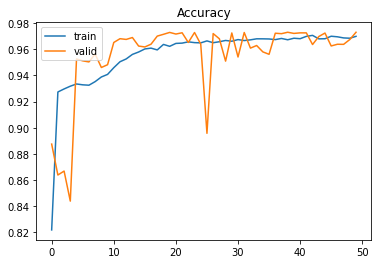

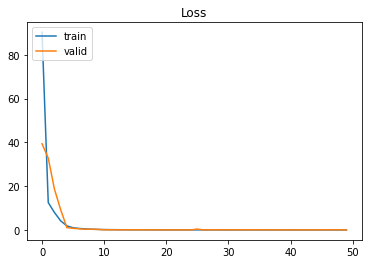

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

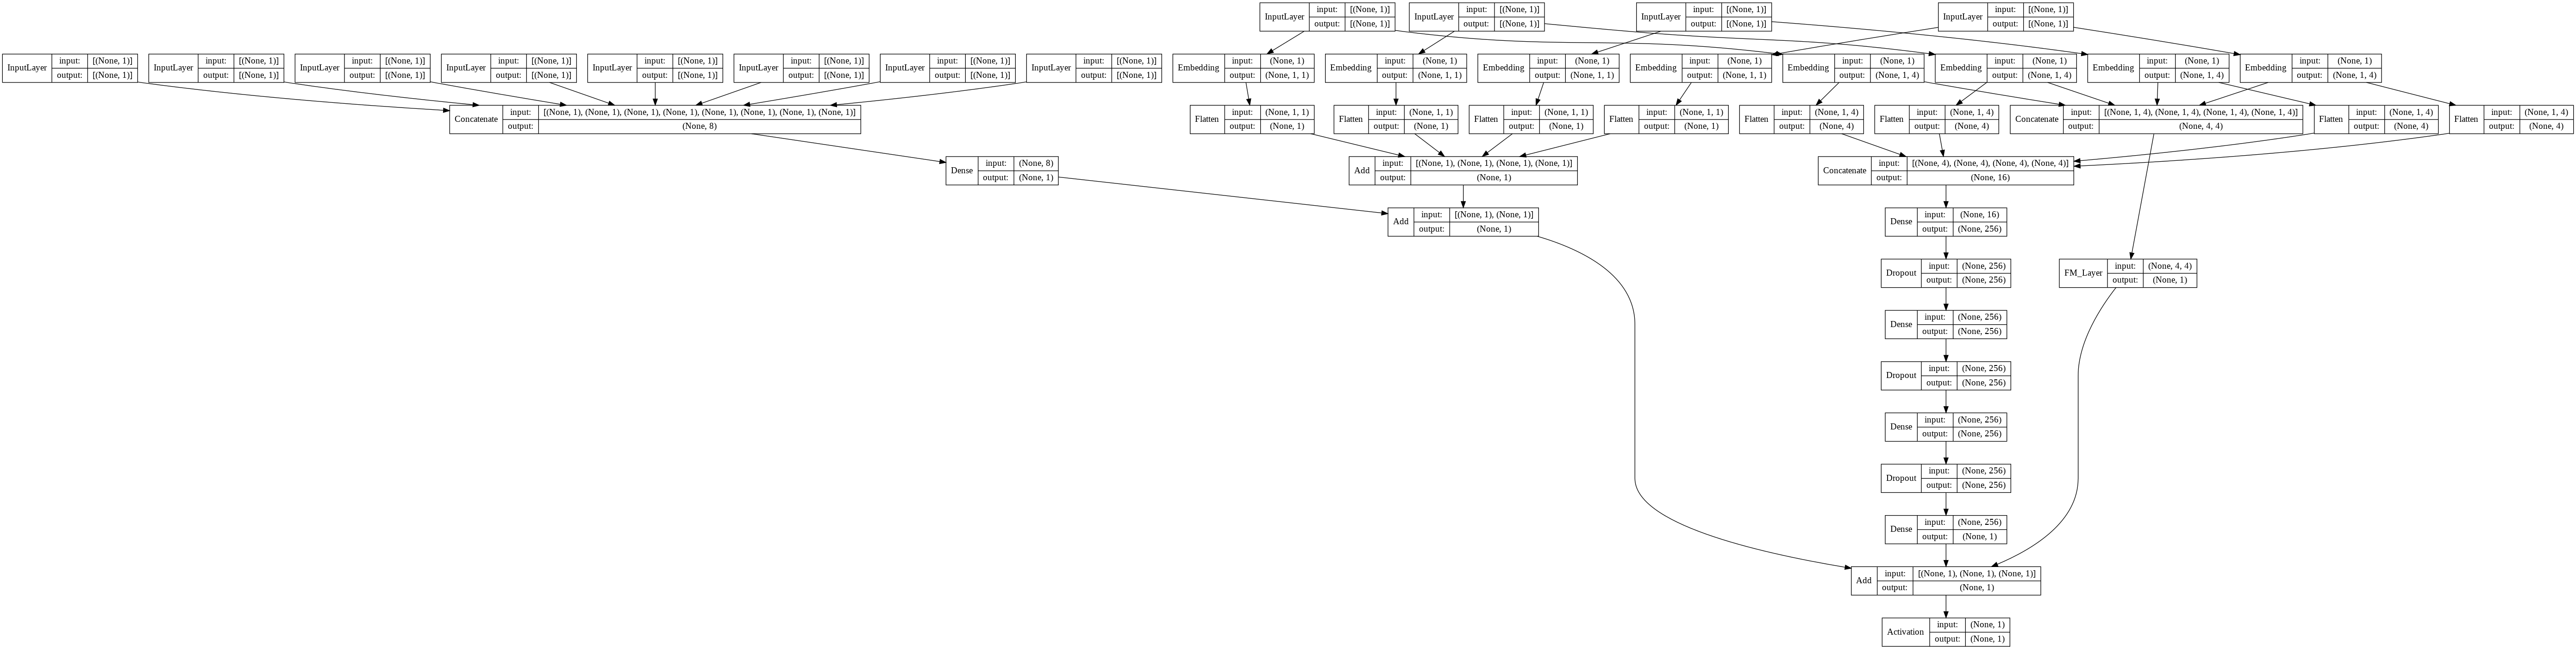

In [ ]:
plot_model(history, to_file='model.png',
           show_shapes=True, show_layer_names=False)

# 저장된 모델 사용

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/졸업프로젝트/deepfm 저장/+address_e(30)_b(256).h5', custom_objects={'FM_Layer': FM_Layer})

TypeError: ignored

# 전체 데이터 로드

In [ ]:
file00 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/couple_full.csv', thousands=',')
file11 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/family_full.csv', thousands=',')
file22 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/hotel_full.csv', thousands=',')
file33 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/questhouse_full.csv', thousands=',')
file44 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/questhouse2_full.csv', thousands=',')
file55 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension1_full.csv', thousands=',')
file66 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension2_full.csv', thousands=',')
file77 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension3_full.csv', thousands=',')
file88 = pd.read_csv('/content/drive/MyDrive/졸업프로젝트/강원도 명소 데이터/final data/pension4_full.csv', thousands=',')

In [ ]:
data_couple = file00.copy()
data_family = file11.copy()
data_hotel = file22.copy()
data_guesthouse = pd.concat([file33,file44], ignore_index=True)
data_pension = pd.concat([file55,file66,file77,file88], ignore_index=True)

In [ ]:
data_couple['belief'] = 0
data_family['belief'] = 0
data_hotel['belief'] = 0         
data_guesthouse['belief'] = 0
data_pension['belief'] = 0

In [ ]:
data_couple = data_couple.drop_duplicates(['user_id','place_id'])
data_family = data_family.drop_duplicates(['user_id','place_id'])
data_hotel = data_hotel.drop_duplicates(['user_id','place_id'])
data_guesthouse = data_guesthouse.drop_duplicates(['user_id','place_id'])
data_pension = data_pension.drop_duplicates(['user_id','place_id'])

In [ ]:
data_couple

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,0,couple,1,514,버드나무브루어리,"호프,요리주점",4.0,304,강원 강릉시 경강로 1961,37.748230,128.884360,1,0
1,0,couple,2,501,테라로사 커피공장,커피전문점,3.5,871,강원 강릉시 구정면 현천길 7,37.696005,128.891887,1,0
2,0,couple,3,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,1,0
3,0,couple,4,676,횡성한우촌,"육류,고기",4.7,37,강원 강릉시 성덕포남로200번길 6,37.769576,128.907955,1,0
4,0,couple,5,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291551,658,couple,8,2996,황소돌곱창구이,"곱창,막창",5.0,17,강원 춘천시 우석로67번길 17,37.865485,127.750965,0,0
1291552,658,couple,5,2997,스시마루,"초밥,롤",3.0,11,강원 춘천시 스무숲길 1,37.850043,127.748694,0,0
1291553,658,couple,10,2998,부용산장가든,한식,3.6,14,강원 춘천시 북산면 오봉산길 672,37.979383,127.816946,0,0
1291554,658,couple,7,2999,청춘활어,회,4.3,20,강원 춘천시 애막골길7번길 29 1층,37.867057,127.752314,0,0


In [ ]:
data_couple[(data_couple['user_id'] == 607) & (data_couple['place_id'] == 2)]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
1189742,607,couple,1,2,경포해변,"해수욕장,해변",4.1,194,강원 강릉시 창해로 514,37.805779,128.907417,0,0


In [ ]:
data_family

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,659,family,1,508,벌집,국수,3.2,377,강원 강릉시 경강로2069번길 15,37.754505,128.892756,1,0
1,660,family,1,318,교동,계곡,0.0,0,강원 강릉시 옥계면 현내리,37.608975,129.029199,1,0
2,661,family,1,2,경포해변,"해수욕장,해변",4.1,194,강원 강릉시 창해로 514,37.805779,128.907417,1,0
3,661,family,2,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1,0
4,662,family,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
219456,770,family,6,2996,황소돌곱창구이,"곱창,막창",5.0,17,강원 춘천시 우석로67번길 17,37.865485,127.750965,0,0
219457,770,family,6,2997,스시마루,"초밥,롤",3.0,11,강원 춘천시 스무숲길 1,37.850043,127.748694,0,0
219458,770,family,10,2998,부용산장가든,한식,3.6,14,강원 춘천시 북산면 오봉산길 672,37.979383,127.816946,0,0
219459,770,family,9,2999,청춘활어,회,4.3,20,강원 춘천시 애막골길7번길 29 1층,37.867057,127.752314,0,0


In [ ]:
data_hotel

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,771,hotel,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
1,772,hotel,1,318,교동,계곡,0.0,0,강원 강릉시 옥계면 현내리,37.608975,129.029199,1,0
2,773,hotel,1,318,교동,계곡,0.0,0,강원 강릉시 옥계면 현내리,37.608975,129.029199,1,0
3,774,hotel,1,318,교동,계곡,0.0,0,강원 강릉시 옥계면 현내리,37.608975,129.029199,1,0
4,775,hotel,1,601,정감,퓨전요리,3.8,151,강원 강릉시 가작로 34,37.771343,128.900328,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400431,1995,hotel,3,2996,황소돌곱창구이,"곱창,막창",5.0,17,강원 춘천시 우석로67번길 17,37.865485,127.750965,0,0
2400432,1995,hotel,1,2997,스시마루,"초밥,롤",3.0,11,강원 춘천시 스무숲길 1,37.850043,127.748694,0,0
2400433,1995,hotel,8,2998,부용산장가든,한식,3.6,14,강원 춘천시 북산면 오봉산길 672,37.979383,127.816946,0,0
2400434,1995,hotel,9,2999,청춘활어,회,4.3,20,강원 춘천시 애막골길7번길 29 1층,37.867057,127.752314,0,0


In [ ]:
data_guesthouse

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,1996,guesthouse,1,550,항구마차,"해물,생선",4.2,86,강원 강릉시 옥계면 금진리 149-3,37.648442,129.046904,1,0
1,1996,guesthouse,2,173,헌화로,드라이브코스,3.5,12,강원 강릉시 강동면 심곡리,37.667299,129.041663,1,0
2,1997,guesthouse,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
3,1997,guesthouse,2,7,오죽헌,유적지,4.1,451,강원 강릉시 율곡로3139번길 24,37.779184,128.879458,1,0
4,1998,guesthouse,1,29,금진해변,"해수욕장,해변",4.1,10,강원 강릉시 옥계면 금진리,37.643212,129.036707,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410237,4756,guesthouse,1,2996,황소돌곱창구이,"곱창,막창",5.0,17,강원 춘천시 우석로67번길 17,37.865485,127.750965,0,0
5410238,4756,guesthouse,6,2997,스시마루,"초밥,롤",3.0,11,강원 춘천시 스무숲길 1,37.850043,127.748694,0,0
5410239,4756,guesthouse,3,2998,부용산장가든,한식,3.6,14,강원 춘천시 북산면 오봉산길 672,37.979383,127.816946,0,0
5410240,4756,guesthouse,1,2999,청춘활어,회,4.3,20,강원 춘천시 애막골길7번길 29 1층,37.867057,127.752314,0,0


In [ ]:
data_pension

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,4757,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
1,4758,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
2,4759,pension,1,2,경포해변,"해수욕장,해변",4.1,194,강원 강릉시 창해로 514,37.805779,128.907417,1,0
3,4760,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
4,4761,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14559935,12186,pension,7,2996,황소돌곱창구이,"곱창,막창",5.0,17,강원 춘천시 우석로67번길 17,37.865485,127.750965,0,0
14559936,12186,pension,2,2997,스시마루,"초밥,롤",3.0,11,강원 춘천시 스무숲길 1,37.850043,127.748694,0,0
14559937,12186,pension,6,2998,부용산장가든,한식,3.6,14,강원 춘천시 북산면 오봉산길 672,37.979383,127.816946,0,0
14559938,12186,pension,8,2999,청춘활어,회,4.3,20,강원 춘천시 애막골길7번길 29 1층,37.867057,127.752314,0,0


# 정리된 데이터 사용시

In [ ]:
data_df_1 = pd.concat([file0, file1, file2, file3, file4, file5, file6, file7, file8], ignore_index=True)
data_df_1['belief'] = 0

In [ ]:
data_df_1

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief
0,0,couple,1,514,버드나무브루어리,"호프,요리주점",4.0,304,강원 강릉시 경강로 1961,37.748230,128.884360,1,0
1,0,couple,2,501,테라로사 커피공장,커피전문점,3.5,871,강원 강릉시 구정면 현천길 7,37.696005,128.891887,1,0
2,0,couple,3,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,1,0
3,0,couple,4,676,횡성한우촌,"육류,고기",4.7,37,강원 강릉시 성덕포남로200번길 6,37.769576,128.907955,1,0
4,0,couple,5,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91072,11190,pension,8,562,바로방,"제과,베이커리",3.2,153,강원 강릉시 경강로 2092,37.754340,128.895874,0,0
91073,11935,pension,9,940,뚱할머니순두부,두부전문점,4.3,17,강원 강릉시 난설헌로 211,37.791904,128.912459,0,0
91074,11494,pension,3,756,스시코우,"초밥,롤",3.3,51,강원 강릉시 하슬라로206번길 16-3,37.767244,128.877471,0,0
91075,12105,pension,9,2835,홍익돈까스 춘천점,"돈까스,우동",2.6,43,강원 춘천시 새롬공원길5번길 11,37.853221,127.745688,0,0


# 추천 명소 함수

In [ ]:
def recommend_li(model, data_df_1, user_id):
  test1_df = data_df_1[data_df_1['user_id'] == user_id]
  test1_r = data_df_1[data_df_1['user_id'] == user_id]
  test1_data = data_process(test1_df, dense_features, sparse_features)
  test1_data['label'] = test1_df['y'] 
  test1_input = {name: test1_data[name] for name in dense_features + sparse_features}
  scores = model.predict(test1_input, batch_size=128)
  scores = scores.tolist()
  yy = []
  for i in range(len(scores)):
    yy.append(scores[i][0])
  test1_r['y_pred'] = yy
  test1_r = test1_r.sort_values(by=['y_pred'], axis=0, ascending=False)
  
  return test1_r[:5]

In [ ]:
def upgrade_belief(test1_r, data_df_1, model):
  re_list = test1_r['place_id'].values
  belief_df = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief'])
  for x in re_list:
    belief_df = belief_df.append(data_df_1[data_df_1['place_id'] == x])
  data_df_1 = data_df_1.drop(belief_df.index)
  belief_df = belief_df.values.tolist()
  test1_r = test1_r.values.tolist()

  for y in range(len(test1_r)): 
    for x in range(len(belief_df)):
      if ((belief_df[x][3] == test1_r[y][3]) and (test1_r[y][11] == 0)):
        belief_df[x][12] = belief_df[x][12] - 5
      elif ((belief_df[x][3] == test1_r[y][3]) and (test1_r[y][11] == 1)):
        belief_df[x][12] = belief_df[x][12] + 5

  up_df = pd.DataFrame(belief_df, columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief'])

  data_df_1 = pd.concat([data_df_1,up_df], ignore_index=True)

  test1_data = data_process(up_df, dense_features, sparse_features)
  test1_data['label'] = up_df['y'] 
  test1_input = {name: test1_data[name] for name in dense_features + sparse_features}

  hist = model.fit(test1_input, test1_data['label'].values, batch_size=128, epochs=10, validation_split=0.2, )

  return data_df_1


추천 코스 함수

In [ ]:
def recommend_course(model, data_df_1, user_id):
  re_df = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief'])
  for j in range(1,6):
    test1_df = data_df_1[data_df_1['user_id'] == user_id]
    test1_df = test1_df.drop(re_df.index)
    if(len(test1_df) == 0):
      break
    #test1_df.loc[(test1_df['course'] != j),'y'] = 0
    test1_df['course'] = j
    test1_r = test1_df.copy()
    test1_data = data_process(test1_df, dense_features, sparse_features)
    test1_data['label'] = test1_df['y'] 
    test1_input = {name: test1_data[name] for name in dense_features + sparse_features}
    scores = model.predict(test1_input, batch_size=128)
    scores = scores.tolist()
    yy = []
    for i in range(len(scores)):
      yy.append(scores[i][0])
    test1_r['y_pred'] = yy
    test1_r = test1_r.sort_values(by=['y_pred'], axis=0, ascending=False)
    re_df = re_df.append(test1_r.head(1))

  return re_df

In [ ]:
def upgrade_belief2(test1_r, data_df_1, model):
  re_list = test1_r['place_id'].values
  belief_df = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief'])
  for x in re_list:
    belief_df = belief_df.append(data_df_1[data_df_1['place_id'] == x])
  data_df_1 = data_df_1.drop(belief_df.index)
  belief_df = belief_df.values.tolist()
  test1_r = test1_r.values.tolist()

  for y in range(len(test1_r)): 
    for x in range(len(belief_df)):
      if ((belief_df[x][3] == test1_r[y][3]) and (test1_r[y][11] == 0)):
        belief_df[x][12] = belief_df[x][12] - 10
      elif ((belief_df[x][3] == test1_r[y][3]) and (test1_r[y][11] == 1)):
        belief_df[x][12] = belief_df[x][12] + 5

  up_df = pd.DataFrame(belief_df, columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief'])

  data_df_1 = pd.concat([data_df_1,up_df], ignore_index=True)

  test1_data = data_process(up_df, dense_features, sparse_features)
  test1_data['label'] = up_df['y'] 
  test1_input = {name: test1_data[name] for name in dense_features + sparse_features}

  hist = model.fit(test1_input, test1_data['label'].values, batch_size=128, epochs=10, validation_split=0.2, )

  return data_df_1


명소 추천 리스트

# 커플

In [ ]:
id_li = [649, 257, 176, 424, 267, 239, 400, 361, 472, 67, 159, 231, 452, 232, 102, 229, 1, 36, 113, 199, 496, 303, 588, 102, 576, 255, 471, 406, 193, 630, 366, 159, 550, 6, 610, 544, 261, 230, 514, 550, 408, 370, 571, 136, 446, 472, 331, 205, 156, 596]

In [ ]:
from random import *
data_df_2 = data_couple.copy()
final_re_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])

#id_li = []
for i in id_li:
  #i = randint(0,658)
  #id_li.append(i)
  test1_c = recommend_li(history, data_couple, i)
  final_re_1 = final_re_1.append(test1_c)
  data_df_2 = upgrade_belief(test1_c, data_df_2, history)


Epoch 1/10
21/21 [==============================] - 0s 15ms/step - loss: 0.1498 - accuracy: 0.9552 - val_loss: 0.1218 - val_accuracy: 0.9818
Epoch 2/10
21/21 [==============================] - 0s 12ms/step - loss: 0.1309 - accuracy: 0.9541 - val_loss: 0.2315 - val_accuracy: 0.9818
Epoch 3/10
21/21 [==============================] - 0s 13ms/step - loss: 0.1228 - accuracy: 0.9560 - val_loss: 0.1574 - val_accuracy: 0.9818
Epoch 4/10
21/21 [==============================] - 0s 12ms/step - loss: 0.1221 - accuracy: 0.9564 - val_loss: 0.1621 - val_accuracy: 0.9818
Epoch 5/10
21/21 [==============================] - 0s 12ms/step - loss: 0.1186 - accuracy: 0.9503 - val_loss: 0.2437 - val_accuracy: 0.9818
Epoch 6/10
21/21 [==============================] - 0s 12ms/step - loss: 0.1224 - accuracy: 0.9545 - val_loss: 0.2135 - val_accuracy: 0.9818
Epoch 7/10
21/21 [==============================] - 0s 12ms/step - loss: 0.1208 - accuracy: 0.9560 - val_loss: 0.2007 - val_accuracy: 0.9818
Epoch 8/10
21

In [ ]:
final_re_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
data_df_2 = data_df_2.drop_duplicates(['user_id','place_id'])

for i in id_li:
  test1_c = recommend_li(history, data_df_2, i)
  final_re_2 = final_re_2.append(test1_c)

In [ ]:
final_re_1[final_re_1['user_id'] == id_li[30]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
718341,366,couple,1,515,풍년갈비,"육류,고기",3.7,1758,강원 강릉시 강릉대로587번길 10-5,37.784430,128.919521,0,0,1.000000
718328,366,couple,4,502,엄지네포장마차 본점,실내포장마차,3.8,1597,강원 강릉시 경강로2255번길 21 엄지빌딩 1층,37.766337,128.906991,0,0,1.000000
718335,366,couple,10,509,동화가든,두부전문점,3.3,1726,강원 강릉시 초당순두부길77번길 15,37.791101,128.914733,0,0,1.000000
718327,366,couple,3,501,테라로사 커피공장,커피전문점,3.5,871,강원 강릉시 구정면 현천길 7,37.696005,128.891887,0,0,0.999999
718415,366,couple,1,589,신대게나라,"게,대게",4.1,1128,강원 강릉시 주문진읍 신리천로 19,37.885349,128.828435,0,0,0.999994


In [ ]:
final_re_2[final_re_2['user_id'] == id_li[30]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
1276856,366,couple,6,1,하슬라아트월드,테마파크,3.7,282,강원 강릉시 강동면 정동진리 524-19,37.707959,129.012171,0,-5,0.999917
1281466,366,couple,4,9,강릉카페거리,카페거리,4.0,199,강원 강릉시 창해로14번길 20,37.772646,128.947203,0,-5,0.999518
702174,366,couple,5,3,정동심곡 바다부채길,"관광,명소",4.3,182,강원 강릉시 강동면 심곡리 114-3,37.666250,129.054547,0,0,0.999170
1282171,366,couple,5,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,0,-10,0.998944
1282865,366,couple,6,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,0,5,0.998197


# 패밀리

In [ ]:
f_li = [736, 712, 758, 694, 663, 770, 730, 765, 757, 669, 755, 716, 735, 744, 737, 714, 728, 671, 753, 685, 750, 762, 679, 722, 764, 706, 709, 745, 670, 744, 770, 741, 702, 676, 770, 756, 744, 721, 726, 740, 701, 730, 685, 720, 730, 692, 669, 708, 734, 727]

In [ ]:
from random import *
data_f_2 = data_family.copy()
final_f_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])

#id_li = []
for i in f_li:
  #i = randint(659,770)
  #id_li.append(i)
  test1_c = recommend_li(history, data_family, i)
  final_f_1 = final_f_1.append(test1_c[:5])
  data_f_2 = upgrade_belief(test1_c, data_f_2, history)


Epoch 1/10
4/4 [==============================] - 0s 50ms/step - loss: 18.0650 - accuracy: 0.0692 - val_loss: 8.8768e-11 - val_accuracy: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 17ms/step - loss: 0.4424 - accuracy: 0.9509 - val_loss: 5.2990e-32 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 19ms/step - loss: 1.5666 - accuracy: 0.9598 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 17ms/step - loss: 2.1201 - accuracy: 0.9598 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 18ms/step - loss: 2.3937 - accuracy: 0.9598 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 20ms/step - loss: 2.5268 - accuracy: 0.9598 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 18ms/step - loss: 2.5608 - accuracy: 0.9598 - val_loss: 0.0000e+00 - val_accuracy: 1.000

In [ ]:
final_f_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
data_f_2 = data_f_2.drop_duplicates(['user_id','place_id'])

for i in f_li:
  test1_c = recommend_li(history, data_f_2, i)
  final_f_2 = final_f_2.append(test1_c[:5])

In [ ]:
final_f_1[final_f_1['user_id'] == f_li[0]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
108,736,family,1,6,안목해변,"해수욕장,해변",4.3,489,강원 강릉시 창해로14번길 51-26,37.771932,128.948935,1,0,1.0
150937,736,family,4,7,오죽헌,유적지,4.1,451,강원 강릉시 율곡로3139번길 24,37.779184,128.879458,0,0,1.0
151409,736,family,4,515,풍년갈비,"육류,고기",3.7,1758,강원 강릉시 강릉대로587번길 10-5,37.784430,128.919521,0,0,1.0
151403,736,family,3,509,동화가든,두부전문점,3.3,1726,강원 강릉시 초당순두부길77번길 15,37.791101,128.914733,0,0,1.0
151396,736,family,3,502,엄지네포장마차 본점,실내포장마차,3.8,1597,강원 강릉시 경강로2255번길 21 엄지빌딩 1층,37.766337,128.906991,0,0,1.0


In [ ]:
final_f_2[final_f_2['user_id'] == f_li[0]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
218766,736,family,2,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,70,0.947904
217623,736,family,1,6,안목해변,"해수욕장,해변",4.3,489,강원 강릉시 창해로14번길 51-26,37.771932,128.948935,1,-10,0.665705
219159,736,family,3,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,0,30,0.325966
217581,736,family,1,3,정동심곡 바다부채길,"관광,명소",4.3,182,강원 강릉시 강동면 심곡리 114-3,37.666250,129.054547,0,-70,0.236381
216909,736,family,1,22,BTS 버스정류장,촬영지,5.0,12,강원 강릉시 주문진읍 향호리 8-39,37.909236,128.821530,0,-10,0.181594


# hotel

In [ ]:
h_li = [1869, 1243, 1946, 1702, 1803, 1015, 887, 1095, 1745, 967, 1253, 1952, 1370, 1458, 1294, 1008, 1090, 1356, 951, 771, 1127, 888, 948, 1217, 1831, 1869, 1786, 1243, 1360, 1915, 1319, 910, 1223, 1769, 1679, 1969, 1840, 1378, 961, 1682, 966, 1989, 1735, 1578, 1431, 1073, 1430, 858, 1482, 1048]

In [ ]:
from random import *
data_h_2 = data_hotel.copy()
final_h_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])

#h_li = []
for i in h_li:
  #i = randint(771,1995)
  #h_li.append(i)
  test1_c = recommend_li(history, data_hotel, i)
  final_h_1 = final_h_1.append(test1_c[:5])
  data_h_2 = upgrade_belief(test1_c, data_h_2, history)


Epoch 1/10
39/39 [==============================] - 1s 13ms/step - loss: 0.2017 - accuracy: 0.9086 - val_loss: 0.1722 - val_accuracy: 0.8890
Epoch 2/10
39/39 [==============================] - 0s 12ms/step - loss: 0.1681 - accuracy: 0.9322 - val_loss: 0.1164 - val_accuracy: 0.9951
Epoch 3/10
39/39 [==============================] - 0s 11ms/step - loss: 0.1537 - accuracy: 0.9357 - val_loss: 0.1563 - val_accuracy: 0.8890
Epoch 4/10
39/39 [==============================] - 0s 10ms/step - loss: 0.1492 - accuracy: 0.9367 - val_loss: 0.1053 - val_accuracy: 0.9951
Epoch 5/10
39/39 [==============================] - 0s 12ms/step - loss: 0.1502 - accuracy: 0.9376 - val_loss: 0.1435 - val_accuracy: 0.8890
Epoch 6/10
39/39 [==============================] - 0s 10ms/step - loss: 0.1507 - accuracy: 0.9333 - val_loss: 0.1831 - val_accuracy: 0.8890
Epoch 7/10
39/39 [==============================] - 0s 11ms/step - loss: 0.1468 - accuracy: 0.9376 - val_loss: 0.1284 - val_accuracy: 0.9241
Epoch 8/10
39

In [ ]:
final_h_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
data_h_2 = data_h_2.drop_duplicates(['user_id','place_id'])

for i in h_li:
  test1_c = recommend_li(history, data_h_2, i)
  final_h_2 = final_h_2.append(test1_c[:5])

In [ ]:
final_h_1[final_h_1['user_id'] == h_li[15]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
465939,1008,hotel,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,0,0,0.947330
465938,1008,hotel,1,7,오죽헌,유적지,4.1,451,강원 강릉시 율곡로3139번길 24,37.779184,128.879458,0,0,0.837632
465940,1008,hotel,2,9,강릉카페거리,카페거리,4.0,199,강원 강릉시 창해로14번길 20,37.772646,128.947203,0,0,0.793125
465951,1008,hotel,1,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,0,0,0.770481
465932,1008,hotel,3,1,하슬라아트월드,테마파크,3.7,282,강원 강릉시 강동면 정동진리 524-19,37.707959,129.012171,0,0,0.646766


In [ ]:
final_h_2[final_h_2['user_id'] == h_li[15]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
2396716,1008,hotel,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,0,40,0.971588
2389047,1008,hotel,1,7,오죽헌,유적지,4.1,451,강원 강릉시 율곡로3139번길 24,37.779184,128.879458,0,-45,0.815771
2381797,1008,hotel,1,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,0,-40,0.516729
2368162,1008,hotel,2,17,강릉솔향수목원,"수목원,식물원",4.5,65,강원 강릉시 구정면 수목원길 156,37.692721,128.860950,0,-10,0.192846
2375519,1008,hotel,2,9,강릉카페거리,카페거리,4.0,199,강원 강릉시 창해로14번길 20,37.772646,128.947203,0,-55,0.181170


# guesthouse

In [ ]:
g_li = [3201, 3485, 3683, 2581, 2101, 3437, 3417, 4228, 4102, 3606, 3105, 2655, 3648, 2536, 3572, 3282, 2924, 3822, 4094, 2852, 2886, 2204, 3407, 3333, 3854, 3154, 4354, 2162, 4741, 3694, 3429, 4731, 4066, 2815, 4227, 2890, 4169, 4744, 4710, 2981, 2703, 4235, 2618, 2752, 2173, 2898, 3497, 4629, 4268, 3136]

In [ ]:
from random import *
data_g_2 = data_guesthouse.copy()
final_g_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])

#id_li = []
for i in g_li:
  #i = randint(659,770)
  #id_li.append(i)
  test1_c = recommend_li(history, data_guesthouse, i)
  final_g_1 = final_g_1.append(test1_c[:5])
  data_g_2 = upgrade_belief(test1_c, data_g_2, history)


Epoch 1/10
87/87 [==============================] - 1s 11ms/step - loss: 0.1544 - accuracy: 0.9395 - val_loss: 0.0612 - val_accuracy: 0.9873
Epoch 2/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1308 - accuracy: 0.9431 - val_loss: 0.0861 - val_accuracy: 0.9873
Epoch 3/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1269 - accuracy: 0.9439 - val_loss: 0.0671 - val_accuracy: 0.9873
Epoch 4/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1248 - accuracy: 0.9427 - val_loss: 0.0869 - val_accuracy: 0.9873
Epoch 5/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1281 - accuracy: 0.9409 - val_loss: 0.0821 - val_accuracy: 0.9873
Epoch 6/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1393 - accuracy: 0.9380 - val_loss: 0.0925 - val_accuracy: 0.9873
Epoch 7/10
87/87 [==============================] - 1s 10ms/step - loss: 0.1223 - accuracy: 0.9432 - val_loss: 0.0631 - val_accuracy: 0.9873
Epoch 8/10
87

In [ ]:
final_g_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
data_g_2 = data_g_2.drop_duplicates(['user_id','place_id'])

for i in g_li:
  test1_c = recommend_li(history, data_g_2, i)
  final_g_2 = final_g_2.append(test1_c[:5])

In [ ]:
final_g_1[final_g_1['user_id'] == g_li[10]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
2173202,3105,guesthouse,1,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,0,0,0.806137
1612,3105,guesthouse,1,11,멍에전망대,전망대,4.1,37,강원 강릉시 왕산면 대기리 2214-272,37.626128,128.741460,1,0,0.386648
2173201,3105,guesthouse,2,3,정동심곡 바다부채길,"관광,명소",4.3,182,강원 강릉시 강동면 심곡리 114-3,37.666250,129.054547,0,0,0.252842
2173242,3105,guesthouse,1,44,쌍둥이동물농장,동물원,3.5,49,강원 강릉시 옥계면 천남리 384,37.608512,129.039082,0,0,0.112212
2173206,3105,guesthouse,4,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,0,0,0.108017


In [ ]:
final_g_2[final_g_2['user_id'] == g_li[10]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
5398870,3105,guesthouse,1,4,강문해변,"해수욕장,해변",4.1,197,강원 강릉시 강문동 182-1,37.795486,128.917920,0,-20,0.247885
5371260,3105,guesthouse,4,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,0,65,0.148455
5400517,3105,guesthouse,1,11,멍에전망대,전망대,4.1,37,강원 강릉시 왕산면 대기리 2214-272,37.626128,128.741460,1,-15,0.030027
5346405,3105,guesthouse,2,3,정동심곡 바다부채길,"관광,명소",4.3,182,강원 강릉시 강동면 심곡리 114-3,37.666250,129.054547,0,-45,0.019632
5387826,3105,guesthouse,4,15,사천해변,"해수욕장,해변",3.8,27,강원 강릉시 사천면 방동리 282-1,37.820295,128.865278,0,25,0.004391


 # 펜션

In [ ]:
p_li = [5569, 12080, 6202, 10011, 6764, 6393, 7473, 6635, 10273, 8280, 5752, 8438, 5377, 10476, 10489, 10958, 6591, 7944, 7451, 6165, 12040, 6641, 10113, 9751, 11463, 5900, 8246, 8208, 8696, 6454, 7588, 11864, 7763, 6294, 8383, 9056, 7591, 7757, 7116, 5333, 5315, 6551, 11506, 10506, 5103, 8092, 6982, 10605, 7032, 5277]

In [ ]:
from random import *
data_p_2 = data_pension.copy()
final_p_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])

#id_li = []
for i in p_li:
  #i = randint(659,770)
  #id_li.append(i)
  test1_c = recommend_li(history, data_pension, i)
  final_p_1 = final_p_1.append(test1_c[:5])
  data_p_2 = upgrade_belief(test1_c, data_p_2, history)


Epoch 1/10
233/233 [==============================] - 3s 11ms/step - loss: 0.1598 - accuracy: 0.9527 - val_loss: 0.2678 - val_accuracy: 0.8525
Epoch 2/10
233/233 [==============================] - 3s 11ms/step - loss: 0.1390 - accuracy: 0.9545 - val_loss: 0.0626 - val_accuracy: 0.9964
Epoch 3/10
233/233 [==============================] - 2s 10ms/step - loss: 0.1256 - accuracy: 0.9546 - val_loss: 0.0577 - val_accuracy: 0.9964
Epoch 4/10
233/233 [==============================] - 3s 11ms/step - loss: 0.1437 - accuracy: 0.9539 - val_loss: 0.0506 - val_accuracy: 0.9964
Epoch 5/10
233/233 [==============================] - 2s 10ms/step - loss: 0.1214 - accuracy: 0.9558 - val_loss: 0.0558 - val_accuracy: 0.9964
Epoch 6/10
233/233 [==============================] - 3s 11ms/step - loss: 0.1200 - accuracy: 0.9570 - val_loss: 0.0303 - val_accuracy: 0.9964
Epoch 7/10
233/233 [==============================] - 3s 11ms/step - loss: 0.1202 - accuracy: 0.9559 - val_loss: 0.0370 - val_accuracy: 0.9964

In [ ]:
final_p_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
data_p_2 = data_p_2.drop_duplicates(['user_id','place_id'])

for i in p_li:
  test1_c = recommend_li(history, data_p_2, i)
  final_p_2 = final_p_2.append(test1_c[:5])

In [ ]:
final_p_1[final_p_1['user_id'] == p_li[10]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
1486,5752,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,0,0.953695
1487,5752,pension,2,2,경포해변,"해수욕장,해변",4.1,194,강원 강릉시 창해로 514,37.805779,128.907417,1,0,0.817528
1950386,5752,pension,1,21,순긋해변,"해수욕장,해변",4.0,25,강원 강릉시 안현동 235-5,37.801911,128.875825,0,0,0.529088
1950382,5752,pension,2,17,강릉솔향수목원,"수목원,식물원",4.5,65,강원 강릉시 구정면 수목원길 156,37.692721,128.860950,0,0,0.440984
1488,5752,pension,3,20,경포호,호수,4.3,88,강원 강릉시 초당동,37.791905,128.915830,1,0,0.435159


In [ ]:
final_p_2[final_p_2['user_id'] == p_li[10]]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,place_lat,place_lng,y,belief,y_pred
14488982,5752,pension,1,8,경포대,문화유적,4.1,95,강원 강릉시 경포로 365,37.795075,128.896598,1,90,0.997811
14363186,5752,pension,4,509,동화가든,두부전문점,3.3,1726,강원 강릉시 초당순두부길77번길 15,37.791101,128.914733,0,-10,0.986239
14355755,5752,pension,6,515,풍년갈비,"육류,고기",3.7,1758,강원 강릉시 강릉대로587번길 10-5,37.784430,128.919521,0,-5,0.906910
14510877,5752,pension,2,2,경포해변,"해수욕장,해변",4.1,194,강원 강릉시 창해로 514,37.805779,128.907417,1,-30,0.866583
14303745,5752,pension,1,66,노추산모정탑길,도보여행,0.0,8,강원 강릉시 왕산면 대기리 산 716,37.570945,128.740637,0,-5,0.597318


# 추천리스트 csv로 저장

In [ ]:
final_re_1.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/couple_nb.csv', index = False, encoding='utf-8')

In [ ]:
final_re_2.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/couple_b.csv', index = False, encoding='utf-8')

In [ ]:
final_f_1.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/family_nb.csv', index = False, encoding='utf-8')

In [ ]:
final_f_2.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/family_b.csv', index = False, encoding='utf-8')

In [ ]:
final_h_1.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/hotel_nb.csv', index = False, encoding='utf-8')

In [ ]:
final_h_2.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/hotel_b.csv', index = False, encoding='utf-8')

In [ ]:
final_g_1.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/guesthouse_nb.csv', index = False, encoding='utf-8')

In [ ]:
final_g_2.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/guesthouse_b.csv', index = False, encoding='utf-8')

In [ ]:
final_p_1.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/pension_nb.csv', index = False, encoding='utf-8')

In [ ]:
final_p_2.to_csv('/content/drive/MyDrive/졸업프로젝트/효진 result data/pension_b.csv', index = False, encoding='utf-8')

# 거리 계산

In [ ]:
import pandas 
from haversine import haversine

In [ ]:
!pip install haversine

# 코스 추천 리스트

belief 사용 x

In [ ]:
from random import *

data_df_2 = data_df_1.copy()
final_re_1 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng', 'y', 'belief','y_pred'])
for i in range(1,11):
  #i = randint(0,200)
  test1_c1 = recommend_course(history, data_df_1, i, 'couple')
  final_re_1 = final_re_1.append(test1_c1)
  data_df_2 = upgrade_belief2(test1_c1, data_df_2, history)
  test1_c2 = recommend_course(history, data_df_1, i, 'couple')
  final_re_1 = final_re_1.append(test1_c2)
  data_df_2 = upgrade_belief2(test1_c2, data_df_2, history)
  test1_c3 = recommend_course(history, data_df_1, i, 'couple')
  final_re_1 = final_re_1.append(test1_c3)
  data_df_2 = upgrade_belief2(test1_c3, data_df_2, history)
  test1_f1 = recommend_course(history, data_df_1, i, 'family')
  final_re_1 = final_re_1.append(test1_f1)
  data_df_2 = upgrade_belief2(test1_f1, data_df_2, history)
  test1_f2 = recommend_course(history, data_df_1, i, 'family')
  final_re_1 = final_re_1.append(test1_f2)
  data_df_2 = upgrade_belief2(test1_f2, data_df_2, history)
  test1_f3 = recommend_course(history, data_df_1, i, 'family')
  final_re_1 = final_re_1.append(test1_f3)
  data_df_2 = upgrade_belief2(test1_f3, data_df_2, history)
  test1_h1 = recommend_course(history, data_df_1, i, 'hotel')
  final_re_1 = final_re_1.append(test1_h1)
  data_df_2 = upgrade_belief2(test1_h1, data_df_2, history)
  test1_h2 = recommend_course(history, data_df_1, i, 'hotel')
  final_re_1 = final_re_1.append(test1_h2)
  data_df_2 = upgrade_belief2(test1_h2, data_df_2, history)
  test1_h3 = recommend_course(history, data_df_1, i, 'hotel')
  final_re_1 = final_re_1.append(test1_h3)
  data_df_2 = upgrade_belief2(test1_h3, data_df_2, history)
  test1_p1 = recommend_course(history, data_df_1, i, 'pension')
  final_re_1 = final_re_1.append(test1_p1)
  data_df_2 = upgrade_belief2(test1_p1, data_df_2, history)
  test1_p2 = recommend_course(history, data_df_1, i, 'pension')
  final_re_1 = final_re_1.append(test1_p2)
  data_df_2 = upgrade_belief2(test1_p2, data_df_2, history)
  test1_p3 = recommend_course(history, data_df_1, i, 'pension')
  final_re_1 = final_re_1.append(test1_p3)
  data_df_2 = upgrade_belief2(test1_p3, data_df_2, history)
  test1_g1 = recommend_course(history, data_df_1, i, 'guesthouse')
  final_re_1 = final_re_1.append(test1_g1)
  data_df_2 = upgrade_belief2(test1_g1, data_df_2, history)
  test1_g2 = recommend_course(history, data_df_1, i, 'guesthouse')
  final_re_1 = final_re_1.append(test1_g2)
  data_df_2 = upgrade_belief2(test1_g2, data_df_2, history)
  test1_g3 = recommend_course(history, data_df_1, i, 'guesthouse')
  final_re_1 = final_re_1.append(test1_g3)
  data_df_2 = upgrade_belief2(test1_g3, data_df_2, history)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Epoch 1/20
3/3 [==============================] - 0s 57ms/step - loss: 7.6751e-04 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9846
Epoch 2/20
3/3 [==============================] - 0s 26ms/step - loss: 7.7000e-04 - accuracy: 1.0000 - val_loss: 0.1316 - val_accuracy: 0.9846
Epoch 3/20
3/3 [==============================] - 0s 27ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.1409 - val_accuracy: 0.9846
Epoch 4/20
3/3 [==============================] - 0s 27ms/step - loss: 5.9364e-04 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9846
Epoch 5/20
3/3 [==============================] - 0s 27ms/step - loss: 6.4904e-04 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9846
Epoch 6/20
3/3 [==============================] - 0s 27ms/step - loss: 4.2118e-04 - accuracy: 1.0000 - val_loss: 0.1609 - val_accuracy: 0.9846
Epoch 7/20
3/3 [==============================] - 0s 30ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0

In [ ]:
final_re_2 = pd.DataFrame(columns=['user_id',	'trip',	'course', 'place_id',	'place_name',	'place_category',	'rating',	'review',	'place_address', 'place_lat', 'place_lng' 'y', 'belief','y_pred'])
for i in range(1,11):
  #i = randint(0,200)
  test1_c1 = recommend_course(history, data_df_2, i, 'couple')
  final_re_2 = final_re_2.append(test1_c1)
  test1_c2 = recommend_course(history, data_df_2, i, 'couple')
  final_re_2 = final_re_2.append(test1_c2)
  test1_c3 = recommend_course(history, data_df_2, i, 'couple')
  final_re_2 = final_re_2.append(test1_c3)
  test1_f1 = recommend_course(history, data_df_2, i, 'family')
  final_re_2 = final_re_2.append(test1_f1)
  test1_f2 = recommend_course(history, data_df_2, i, 'family')
  final_re_2 = final_re_2.append(test1_f2)
  test1_f3 = recommend_course(history, data_df_2, i, 'family')
  final_re_2 = final_re_2.append(test1_f3)
  test1_h1 = recommend_course(history, data_df_2, i, 'hotel')
  final_re_2 = final_re_2.append(test1_h1)
  test1_h2 = recommend_course(history, data_df_2, i, 'hotel')
  final_re_2 = final_re_2.append(test1_h2)
  test1_h3 = recommend_course(history, data_df_2, i, 'hotel')
  final_re_2 = final_re_2.append(test1_h3)
  test1_p1 = recommend_course(history, data_df_2, i, 'pension')
  final_re_2 = final_re_2.append(test1_p1)
  test1_p2 = recommend_course(history, data_df_2, i, 'pension')
  final_re_2 = final_re_2.append(test1_p2)
  test1_p3 = recommend_course(history, data_df_2, i, 'pension')
  final_re_2 = final_re_2.append(test1_p3)
  test1_g1 = recommend_course(history, data_df_2, i, 'guesthouse')
  final_re_2 = final_re_2.append(test1_g1)
  test1_g2 = recommend_course(history, data_df_2, i, 'guesthouse')
  final_re_2 = final_re_2.append(test1_g2)
  test1_g3 = recommend_course(history, data_df_2, i, 'guesthouse')
  final_re_2 = final_re_2.append(test1_g3)

In [ ]:
final_re_1[(data_df_1['user_id'] == 9) & (data_df_1['trip'] == 'couple')][:5]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,y,belief,y_pred
20979,9,couple,1,4600,후평왕족발,"족발,보쌈",2.6,29,강원 춘천시 춘천로 293,0,0,0.999933
16062,9,couple,2,5291,카페크레아,디저트카페,5.0,7,강원 춘천시 후석로46번길 8 1층,0,0,0.999631
25524,9,couple,3,2259,피자나라치킨공주 강릉교동점,피자,1.8,0,강원 강릉시 원대로 27,0,0,0.998671
24258,9,couple,4,2174,치킨더치킨 관동대점,치킨,5.0,0,강원 강릉시 관대길 32,0,0,0.987253
23166,9,couple,5,515,장안회집,회,3.5,145,강원 강릉시 사천면 진리항구길 51,0,0,0.998209


In [ ]:
final_re_2[(data_df_2['user_id'] == 9) & (data_df_2['trip'] == 'couple')][:5]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,y,belief,y_pred
534743,9,couple,1,5390,소파,카페,0.0,0,강원 춘천시 퇴계로145번길 15-15 1층,1,20,0.999999
528987,9,couple,2,4600,후평왕족발,"족발,보쌈",2.6,29,강원 춘천시 춘천로 293,0,-30,0.995261
529049,9,couple,3,2259,피자나라치킨공주 강릉교동점,피자,1.8,0,강원 강릉시 원대로 27,0,-30,0.983248
11451,9,couple,4,3244,꿉자 대관령점,햄버거,0.0,8,강원 평창군 대관령면 대관령로 107,0,0,0.961737
14233,9,couple,5,6832,33떡볶이 춘천거두점,떡볶이,5.0,2,강원 춘천시 동내면 춘천순환로 66,0,0,0.378102


In [ ]:
final_re_1[(data_df_1['user_id'] == 9) & (data_df_1['trip'] == 'pension')][:5]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,y,belief,y_pred
287711,9,pension,1,4912,해풍,회,4.3,6,강원 춘천시 보안길 8,0,0,0.999943
296284,9,pension,2,5146,춘천은가을도봄이지,카페,2.0,16,강원 춘천시 신북읍 신샘밭로 655 1층,0,0,0.999422
284584,9,pension,3,3271,하이돈까스,"돈까스,우동",4.5,22,강원 강릉시 관솔길 18 1층,0,0,0.994163
281692,9,pension,4,8149,회정부페,뷔페,0.0,0,강원 춘천시 춘천로176번길 9-1,0,0,0.985623
242330,9,pension,5,565,토담순두부,두부전문점,2.5,152,강원 강릉시 난설헌로193번길 1-19,1,0,0.958828


In [ ]:
final_re_2[(data_df_2['user_id'] == 9) & (data_df_2['trip'] == 'pension')][:5]

,user_id,trip,course,place_id,place_name,place_category,rating,review,place_address,y,belief,y_pred
532554,9,pension,1,4912,해풍,회,4.3,6,강원 춘천시 보안길 8,0,-30,0.999810
223168,9,pension,2,1257,에티오피아,커피전문점,4.7,3,강원 강릉시 안현로 36,1,0,0.996307
532797,9,pension,3,6375,짬부돈,한정식,4.0,9,강원 춘천시 퇴계로 5,0,-10,0.999884
223171,9,pension,4,2226,치맥,치킨,0.0,0,강원 강릉시 하평2길 6,1,0,0.878072
228350,9,pension,5,217,퇴곡이리,계곡,0.0,0,강원 강릉시 연곡면 퇴곡리,0,0,0.725239
